# <b>APPLE 주가 예측 - ARIMA</b>

[*********************100%%**********************]  1 of 1 completed


,AAPL
2009-06-01,4.976786
2009-06-02,4.981786
2009-06-03,5.033929
2009-06-04,5.133571
2009-06-05,5.166786
...,...
2023-12-07,214.289993
2023-12-08,209.679993
2023-12-11,207.490005
2023-12-12,208.139999


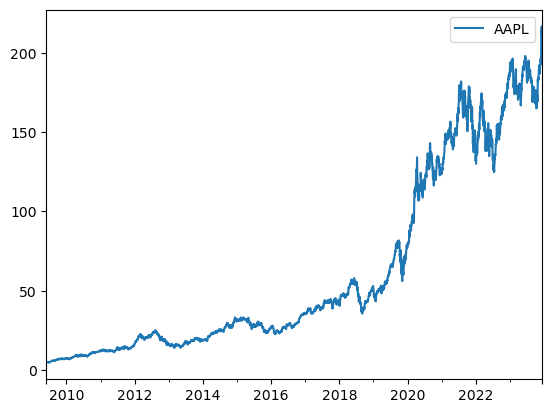

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

stock = ['AAPL']
start_date = '2009-06-01'
end_date = '2024-06-26'

df = pd.DataFrame()
for key in stock:
    df[key] = yf.download(key, start=start_date, end=end_date)['Close']

df.index = pd.date_range(start=start_date, periods=len(df), freq= 'B') # B로 하면 2023-11-21까지, D로 하면 2019-10-03

df.plot()
df

In [2]:
import statsmodels.api as sm

sm.tsa.stattools.acf(df, nlags=7, fft=False) # 자기상관계수

array([1.        , 0.99872028, 0.99746495, 0.99622964, 0.99498059,
       0.99367706, 0.99233698, 0.99105433])

In [3]:
sm.tsa.stattools.pacf(df, nlags=7) # 편자기상관계수

array([ 1.        ,  0.99898366,  0.0112343 ,  0.00925116, -0.00728643,
       -0.02767901, -0.0196113 ,  0.0266159 ])

### 자기상관계수는 서서히 감소, 편자기상관계수는 lag 2에서 급속히 감소 -> AR(1) 모형

In [4]:
import statsmodels.tsa.api as tsa

model = tsa.ARIMA(df, order=(1,0,0))
result = model.fit()
print(result.summary())

C:\Users\eunseok\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                               SARIMAX Results                                
Dep. Variable:                   AAPL   No. Observations:                 3793
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -6944.265
Date:                Sat, 13 Jul 2024   AIC                          13894.530
Time:                        01:32:33   BIC                          13913.253
Sample:                    06-01-2009   HQIC                         13901.185
                         - 12-13-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         62.3934    323.294      0.193      0.847    -571.250     696.037
ar.L1          0.9999      0.001   1830.043      0.000       0.999       1.001
sigma2         2.2740      0.020    115.668      0.0

In [5]:
# 미래 시계열 값 예측
forecast = result.forecast(6)
forecast

2023-12-14    209.052733
2023-12-15    209.035460
2023-12-18    209.018189
2023-12-19    209.000920
2023-12-20    208.983654
2023-12-21    208.966389
Freq: B, Name: predicted_mean, dtype: float64

- 실제값  
2023-12-14 -> 198.11  
2023-12-15 -> 197.57  
2023-12-18 -> 195.89  
2023-12-19 -> 196.94  
2023-12-20 -> 194.83  
2023-12-21 -> 194.83

### MAPE = 1/6 * (5.52 + 5.80 + 6.73 + 6.15 + 7.26 + 7.30) = 38.76 / 6 = 6.46
모델이 예측한 주식 가격이 실제 주식 가격과 평균적으로 약 6.46%의 절대 백분율 오차를 가지고 있다.  
일반적으로 MAPE가 낮을수록 모델의 예측 정확도가 더 높다고 평가된다.  
이 경우에는 평균적으로 약 6.46%의 오차가 발생했으므로, 모델이 주식 가격을 예측하는 데에 있어서 일정 수준의 정확도를 보여준다고 해석할 수 있다.

# <b>Multinomial Logistic Regression</b>
- 추가: end_date = datetime.date.today()
- 삭제: df.index = pd.date_range(start=start_date, periods=len(df), freq= 'B')


In [6]:
import datetime

end_date = datetime.date.today()
print(end_date)

2024-07-13


## 1. 애플, 마이크로소프트, 구글, 아마존 feature 생성

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,AAPL,MSFT,GOOG,AMZN
Date,,,,
2009-06-01,4.976786,21.400000,10.624178,4.152500
2009-06-02,4.981786,21.400000,10.670006,4.246500
2009-06-03,5.033929,21.730000,10.750953,4.284000
2009-06-04,5.133571,21.830000,10.965897,4.276000
2009-06-05,5.166786,22.139999,11.066520,4.378000
...,...,...,...,...
2024-07-08,227.820007,466.239990,190.479996,199.289993
2024-07-09,228.679993,459.540009,190.440002,199.339996
2024-07-10,232.979996,466.250000,192.660004,199.789993


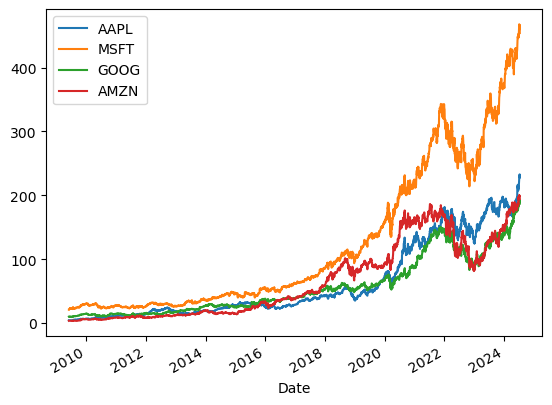

In [7]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

stock = ['AAPL', 'MSFT', 'GOOG', 'AMZN']
start_date = '2009-06-01'
end_date = datetime.date.today()

df = pd.DataFrame()
for key in stock:
    df[key] = yf.download(key, start=start_date, end=end_date)['Close']

df.plot()
df

## 2. 애플 주식 거래량 feature 추가
- 삭제: AAPL_Vol.index = pd.date_range(start=start_date, periods=len(df), freq= 'B')

In [8]:
AAPL_Vol = yf.download('AAPL', start_date, end_date)['Volume']

df['AAPL_Vol'] = AAPL_Vol
df

[*********************100%%**********************]  1 of 1 completed


,AAPL,MSFT,GOOG,AMZN,AAPL_Vol
Date,,,,,
2009-06-01,4.976786,21.400000,10.624178,4.152500,452499600
2009-06-02,4.981786,21.400000,10.670006,4.246500,456223600
2009-06-03,5.033929,21.730000,10.750953,4.284000,565199600
2009-06-04,5.133571,21.830000,10.965897,4.276000,550634000
2009-06-05,5.166786,22.139999,11.066520,4.378000,632716000
...,...,...,...,...,...
2024-07-08,227.820007,466.239990,190.479996,199.289993,59085900
2024-07-09,228.679993,459.540009,190.440002,199.339996,48076100
2024-07-10,232.979996,466.250000,192.660004,199.789993,62627700


## 3. 애플 RSI feature 추가

In [9]:
def calculate_rsi(data, window):
    delta = data.diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# RSI 추가 (14일 기간 사용) -> 14개의 data가 NaN이 되므로 삭제
df['AAPL_RSI'] = calculate_rsi(df['AAPL'], 14)

df.dropna(inplace=True)
df

,AAPL,MSFT,GOOG,AMZN,AAPL_Vol,AAPL_RSI
Date,,,,,,
2009-06-18,4.852857,23.500000,10.312845,4.080000,427680400,38.608000
2009-06-19,4.981429,24.070000,10.463032,4.148000,721856800,50.345201
2009-06-22,4.906071,23.280001,10.145721,3.957500,634914000,44.903848
2009-06-23,4.786071,23.340000,10.104127,3.884000,706532400,34.713663
2009-06-24,4.865000,23.469999,10.194040,3.963500,485525600,33.001903
...,...,...,...,...,...,...
2024-07-08,227.820007,466.239990,190.479996,199.289993,59085900,68.856087
2024-07-09,228.679993,459.540009,190.440002,199.339996,48076100,66.086250
2024-07-10,232.979996,466.250000,192.660004,199.789993,62627700,73.808920


## 4. 애플 EPS, PER feature 추가(https://www.macrotrends.net/stocks/charts/AAPL/apple/pe-ratio#google_vignette)
- 추가: 2009-12-31 ~ 2013-12-31까지의 EPS와 PER

In [10]:
dates = [
    "2009-12-31", "2010-03-31", "2010-06-30", "2010-09-30", "2010-12-31",
    "2011-03-31", "2011-06-30", "2011-09-30", "2011-12-31", "2012-03-31",
    "2012-06-30", "2012-09-30", "2012-12-31", "2013-03-31", "2013-06-30",
    "2013-09-30", "2013-12-31", "2014-03-31", "2014-06-30", "2014-09-30",
    "2014-12-31", "2015-03-31", "2015-06-30", "2015-09-30", "2015-12-31",
    "2016-03-31", "2016-06-30", "2016-09-30", "2016-12-31", "2017-03-31",
    "2017-06-30", "2017-09-30", "2017-12-31", "2018-03-31", "2018-06-30",
    "2018-09-30", "2018-12-31", "2019-03-31", "2019-06-30", "2019-09-30",
    "2019-12-31", "2020-03-31", "2020-06-30", "2020-09-30", "2020-12-31",
    "2021-03-31", "2021-06-30", "2021-09-30", "2021-12-31", "2022-03-31",
    "2022-06-30", "2022-09-30", "2022-12-31", "2023-03-31", "2023-06-30",
    "2023-09-30", "2023-12-31", "2024-03-31"
]

eps_values = [
    0.37, 0.42, 0.47, 0.54, 0.64, 0.75, 0.9, 0.99, 1.25, 1.47,
    1.52, 1.58, 1.58, 1.5, 1.43, 1.42, 1.44, 1.5, 1.55, 1.61,
    1.86, 2.03, 2.17, 2.31, 2.36, 2.25, 2.15, 2.08, 2.1, 2.15,
    2.21, 2.3, 2.44, 2.59, 2.76, 2.98, 3.05, 2.99, 2.95, 2.97,
    3.18, 3.2, 3.31, 3.28, 3.71, 4.47, 5.12, 5.61, 6.03, 6.15,
    6.05, 6.11, 5.89, 5.89, 5.95, 6.13, 6.43, 6.44
]

per_values = [
    17.38, 16.85, 16, 15.83, 15.23, 14.04, 11.23, 11.65, 9.75, 12.36,
    11.6, 12.82, 10.29, 9.06, 8.55, 10.42, 12.13, 11.25, 13.25, 13.88,
    13.24, 13.75, 13, 10.78, 10.12, 11.04, 10.23, 12.56, 12.81, 15.59,
    15.25, 15.73, 16.39, 15.32, 15.94, 18.07, 12.37, 15.29, 16.22, 18.26,
    22.47, 19.35, 26.95, 34.55, 35.05, 26.82, 26.3, 24.84, 29.04, 28.03,
    22.35, 22.4, 21.88, 27.81, 32.43, 27.82, 29.86, 26.59
]

AAPL_EPS_PER = pd.DataFrame({
    'Date': dates,
    'EPS': eps_values,
    'PER': per_values
})

# 'Date' 열을 날짜 형식으로 변환, df.dtypes
AAPL_EPS_PER['Date'] = pd.to_datetime(AAPL_EPS_PER['Date'])
AAPL_EPS_PER.set_index('Date', inplace=True)
AAPL_EPS_PER.head()

,EPS,PER
Date,,
2009-12-31,0.37,17.38
2010-03-31,0.42,16.85
2010-06-30,0.47,16.00
2010-09-30,0.54,15.83
2010-12-31,0.64,15.23


In [11]:
AAPL_EPS_PER = AAPL_EPS_PER.resample('D').interpolate('linear')
AAPL_EPS_PER

,EPS,PER
Date,,
2009-12-31,0.370000,17.380000
2010-01-01,0.370556,17.374111
2010-01-02,0.371111,17.368222
2010-01-03,0.371667,17.362333
2010-01-04,0.372222,17.356444
...,...,...
2024-03-27,6.439560,26.733736
2024-03-28,6.439670,26.697802
2024-03-29,6.439780,26.661868


## df와 AAPL_EPS_PER을 공통된 인덱스로 병합 (inner join)
- 수정: outer join에서 inner join

In [12]:
merged_df = df.merge(AAPL_EPS_PER, how='inner', left_index=True, right_index=True)

merged_df.head(20)

,AAPL,MSFT,GOOG,AMZN,AAPL_Vol,AAPL_RSI,EPS,PER
Date,,,,,,,,
2009-12-31,7.526071,30.480000,15.441621,6.7260,352410800,69.524857,0.370000,17.380000
2010-01-04,7.643214,30.950001,15.610239,6.6950,493729600,75.353976,0.372222,17.356444
2010-01-05,7.656429,30.959999,15.541497,6.7345,601904800,74.033173,0.372778,17.350556
2010-01-06,7.534643,30.770000,15.149715,6.6125,552160000,72.826109,0.373333,17.344667
2010-01-07,7.520714,30.450001,14.797037,6.5000,477131200,71.401030,0.373889,17.338778
2010-01-08,7.570714,30.660000,14.994298,6.6760,447610800,79.108761,0.374444,17.332889
2010-01-11,7.503929,30.270000,14.971633,6.5155,462229600,72.337209,0.376111,17.315222
2010-01-12,7.418571,30.070000,14.706875,6.3675,594459600,64.622465,0.376667,17.309333
2010-01-13,7.523214,30.350000,14.622441,6.4555,605892000,65.473658,0.377222,17.303444


## 5. Daily Data -> Weekly Data로 전환, 21일(3주) 이동평균 feature 추가
- 추가: 주간 총 거래량 - weekly_df['AAPL_Vol'] = merged_df['AAPL_Vol'].resample('W').sum()

In [13]:
weekly_df = merged_df.resample('W').last() # 주간 종가 데이터

weekly_df['AAPL_Vol'] = merged_df['AAPL_Vol'].resample('W').sum() # 주간 총 거래량

weekly_df['AAPL_MA21'] = weekly_df['AAPL'].rolling(3).mean() # 21일 이동평균
weekly_df.dropna(inplace=True)

price_df = weekly_df.copy() # 선형회귀 모델 데이터프레임

weekly_df # 2010-01-17: 2010-01-11 ~ 2010-01-15

,AAPL,MSFT,GOOG,AMZN,AAPL_Vol,AAPL_RSI,EPS,PER,AAPL_MA21
Date,,,,,,,,,
2010-01-17,7.354643,30.860001,14.445853,6.357000,2689542800,44.691041,0.378333,17.291667,7.483809
2010-01-24,7.062500,28.959999,13.698903,6.071500,2832082400,36.238355,0.382222,17.250444,7.329286
2010-01-31,6.859286,28.180000,13.199027,6.270500,7074832800,34.500473,0.386111,17.209222,7.092143
2010-02-07,6.980714,28.020000,13.232651,5.869500,3671505600,42.533146,0.390000,17.168000,6.967500
2010-02-14,7.156429,27.930000,13.278230,5.983000,2687333600,47.205489,0.393889,17.126778,6.998809
...,...,...,...,...,...,...,...,...,...
2024-03-03,179.660004,415.500000,138.080002,178.220001,354310800,24.112669,6.436703,27.668022,181.496668
2024-03-10,170.729996,406.220001,136.289993,175.350006,393109900,25.466088,6.437473,27.416484,177.636668
2024-03-17,172.619995,416.420013,142.169998,174.419998,367031800,31.967882,6.438242,27.164945,174.336665


## 6. MSFT, GOOG, AMZN 절대적 값 -> 등락 퍼센트로 수정(07.09)

In [14]:
weekly_df2 = weekly_df.copy()
weekly_df2['MSFT'] = weekly_df2['MSFT'].pct_change() # 전 시점 대비 현 시점 등락 퍼센트
weekly_df2['GOOG'] = weekly_df2['GOOG'].pct_change()
weekly_df2['AMZN'] = weekly_df2['AMZN'].pct_change()

weekly_df2.dropna(inplace=True)
weekly_df2

,AAPL,MSFT,GOOG,AMZN,AAPL_Vol,AAPL_RSI,EPS,PER,AAPL_MA21
Date,,,,,,,,,
2010-01-24,7.062500,-0.061568,-0.051707,-0.044911,2832082400,36.238355,0.382222,17.250444,7.329286
2010-01-31,6.859286,-0.026934,-0.036490,0.032776,7074832800,34.500473,0.386111,17.209222,7.092143
2010-02-07,6.980714,-0.005678,0.002547,-0.063950,3671505600,42.533146,0.390000,17.168000,6.967500
2010-02-14,7.156429,-0.003212,0.003444,0.019337,2687333600,47.205489,0.393889,17.126778,6.998809
2010-02-21,7.202500,0.030075,0.014331,-0.017884,1818429200,64.556210,0.397778,17.085556,7.113214
...,...,...,...,...,...,...,...,...,...
2024-03-03,179.660004,0.012575,-0.049625,0.018458,354310800,24.112669,6.436703,27.668022,181.496668
2024-03-10,170.729996,-0.022335,-0.012964,-0.016104,393109900,25.466088,6.437473,27.416484,177.636668
2024-03-17,172.619995,0.025110,0.043143,-0.005304,367031800,31.967882,6.438242,27.164945,174.336665


## 7. Label 생성
- 수정: ValueError: Unknown label type: 'unknown' 때문에 Label 초기값을 ' '에서 5로 변경 -> weekly_df['Label'] = 5 
- 삭제: ChatGPT 코드 삭제 -> 3% 이상 상승했을 때 전 시점의 데이터의 Label이 아니라 해당 Label이 1로 바뀌기 때문

In [15]:
weekly_df2['Label'] = 5

for i in range(len(weekly_df2) - 1):  # 마지막 데이터 제외
    if weekly_df2['AAPL'].iloc[i + 1] >= weekly_df2['AAPL'].iloc[i] * 1.03:  # 3% 이상 상승 -> 1
        weekly_df2.loc[weekly_df2.index[i], 'Label'] = 1
    elif weekly_df2['AAPL'].iloc[i + 1] <= weekly_df2['AAPL'].iloc[i] * 0.97:  # -3% 이상 하락 -> -1
        weekly_df2.loc[weekly_df2.index[i], 'Label'] = -1
    else:
        weekly_df2.loc[weekly_df2.index[i], 'Label'] = 0  # -3% ~ 3% 보합 -> 0

weekly_df2 = weekly_df2[weekly_df2['Label'] != 5]
weekly_df2

,AAPL,MSFT,GOOG,AMZN,AAPL_Vol,AAPL_RSI,EPS,PER,AAPL_MA21,Label
Date,,,,,,,,,,
2010-01-24,7.062500,-0.061568,-0.051707,-0.044911,2832082400,36.238355,0.382222,17.250444,7.329286,0
2010-01-31,6.859286,-0.026934,-0.036490,0.032776,7074832800,34.500473,0.386111,17.209222,7.092143,0
2010-02-07,6.980714,-0.005678,0.002547,-0.063950,3671505600,42.533146,0.390000,17.168000,6.967500,0
2010-02-14,7.156429,-0.003212,0.003444,0.019337,2687333600,47.205489,0.393889,17.126778,6.998809,0
2010-02-21,7.202500,0.030075,0.014331,-0.017884,1818429200,64.556210,0.397778,17.085556,7.113214,0
...,...,...,...,...,...,...,...,...,...,...
2024-02-25,182.520004,0.015542,0.024901,0.032329,192607200,40.280199,6.435934,27.919560,184.560003,0
2024-03-03,179.660004,0.012575,-0.049625,0.018458,354310800,24.112669,6.436703,27.668022,181.496668,-1
2024-03-10,170.729996,-0.022335,-0.012964,-0.016104,393109900,25.466088,6.437473,27.416484,177.636668,0


In [16]:
weekly_df2['Label'].value_counts() # 3% 이상 상승: 172개, -3% 이상 하락: 124개, -3%~3% 보합: 444개

 0    444
 1    172
-1    124
Name: Label, dtype: int64

## Model 훈련 및 테스트

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# feature 정의
features = weekly_df2.drop(columns=['Label'])

# target 정의
target = weekly_df2['Label']

# 시간 순서에 따라 훈련 및 테스트 세트로 분할
split_point = int(len(features) * 0.8)  # 80% 지점, train: 592개, test: 149개
X_train = features[:split_point]
X_test = features[split_point:] 
y_train = target[:split_point]
y_test = target[split_point:]

# 데이터를 표준화합니다.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 로지스틱 회귀 모델을 초기화합니다.
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

# 모델을 훈련합니다.
model.fit(X_train_scaled, y_train)

# 훈련 데이터셋을 사용해 모델 정확도 계산
training_accuracy = model.score(X_train_scaled, y_train)
print("Training Accuracy:", round(training_accuracy, 4))

# 테스트 데이터셋을 사용해 모델 정확도 계산
test_accuracy = model.score(X_test_scaled, y_test)
print("Test Accuracy:", round(test_accuracy, 4))

Training Accuracy: 0.6064
Test Accuracy: 0.3851


In [18]:
features.corr().style.background_gradient()

,AAPL,MSFT,GOOG,AMZN,AAPL_Vol,AAPL_RSI,EPS,PER,AAPL_MA21
AAPL,1.000000,0.034064,0.020214,-0.022602,-0.568935,-0.024773,0.966805,0.899987,0.999197
MSFT,0.034064,1.000000,0.592660,0.530686,-0.109868,0.273105,0.028897,0.019771,0.017453
GOOG,0.020214,0.592660,1.000000,0.572283,-0.069744,0.270850,0.002208,0.020920,0.005196
AMZN,-0.022602,0.530686,0.572283,1.000000,-0.044109,0.243271,-0.034505,-0.016072,-0.035907
AAPL_Vol,-0.568935,-0.109868,-0.069744,-0.044109,1.000000,-0.064728,-0.652316,-0.466016,-0.567394
AAPL_RSI,-0.024773,0.273105,0.270850,0.243271,-0.064728,1.000000,-0.068721,0.019535,-0.046660
EPS,0.966805,0.028897,0.002208,-0.034505,-0.652316,-0.068721,1.000000,0.794356,0.968021
PER,0.899987,0.019771,0.020920,-0.016072,-0.466016,0.019535,0.794356,1.000000,0.898430
AAPL_MA21,0.999197,0.017453,0.005196,-0.035907,-0.567394,-0.046660,0.968021,0.898430,1.000000


# confusion_matrix

In [19]:
from sklearn.metrics import confusion_matrix

y_test_pred = model.predict(X_test_scaled)

confusion_matrix(y_test, y_test_pred)

array([[21,  3,  0],
       [58, 36,  0],
       [14, 16,  0]], dtype=int64)

In [20]:
y_train_pred = model.predict(X_train_scaled)

confusion_matrix(y_train, y_train_pred)

array([[  3,  92,   5],
       [  4, 342,   4],
       [  3, 125,  14]], dtype=int64)

In [21]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

          -1       0.23      0.88      0.36        24
           0       0.65      0.38      0.48        94
           1       0.00      0.00      0.00        30

    accuracy                           0.39       148
   macro avg       0.29      0.42      0.28       148
weighted avg       0.45      0.39      0.37       148



C:\Users\eunseok\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\eunseok\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\eunseok\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Model Parameter 기울기

In [22]:
weekly_df2.head(1)

,AAPL,MSFT,GOOG,AMZN,AAPL_Vol,AAPL_RSI,EPS,PER,AAPL_MA21,Label
Date,,,,,,,,,,
2010-01-24,7.0625,-0.061568,-0.051707,-0.044911,2832082400,36.238355,0.382222,17.250444,7.329286,0


In [23]:
model.coef_

array([[ 0.43645327, -0.19534017,  0.20325992,  0.01756552,  0.15221257,
        -0.14503554, -0.51604503, -0.73069108,  0.73532375],
       [ 0.18481307,  0.08660478, -0.03560115,  0.08731059, -0.23343701,
         0.13753825,  0.07418992,  0.03452063, -0.40185612],
       [-0.62126634,  0.10873539, -0.16765876, -0.10487611,  0.08122444,
         0.00749729,  0.44185511,  0.69617045, -0.33346762]])

# Accuracy 변화
- 과적합(overfitting): 훈련 데이터셋의 정확도가 높고 테스트 데이터셋의 정확도가 낮을 경우.
- 과소적합(underfitting): 훈련 데이터셋과 테스트 데이터셋 모두에서 정확도가 낮을 경우3

#### 1. AAPL, MSFT, GOOG, AMZN
Training Accuracy: 0.5978, Test Accuracy: 0.6203
#### 2. AAPL, MSFT, GOOG, AMZN, AAPL_Vol
Training Accuracy: 0.5962, Test Accuracy: 0.6203
#### 3. AAPL, MSFT, GOOG, AMZN, AAPL_Vol, AAPL_RSI
Training Accuracy: 0.6083, Test Accuracy: 0.6115
#### 4. AAPL, MSFT, GOOG, AMZN, AAPL_Vol, AAPL_RSI, AAPL_MA21
Training Accuracy: 0.607, Test Accuracy: 0.5987
#### 5. AAPL, MSFT, GOOG, AMZN, AAPL_Vol, AAPL_RSI, AAPL_MA21, EPS, PER
Training Accuracy: 0.603, 
Test Accuracy: 0.5235
#### 6. AAPL, pct_change(MSFT, GOOG, AMZN), AAPL_Vol, AAPL_RSI, AAPL_MA21, EPS, PER
Training Accuracy: 0.6064, Test Accuracy: 0.3851

---

---

# <b>Feature별 Model 훈련 및 평가

# AAPL, MSFT, GOOG, AMZN
Training Accuracy: 0.5978, Test Accuracy: 0.6203

In [24]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

stock = ['AAPL', 'MSFT', 'GOOG', 'AMZN']
start_date = '2009-06-01'
end_date = datetime.date.today()

df = pd.DataFrame()
for key in stock:
    df[key] = yf.download(key, start=start_date, end=end_date)['Close']

weekly_df = df.resample('W').last() # 주간 종가 데이터

######################################################################
weekly_df['Label'] = 5

for i in range(len(weekly_df) - 1):  # 마지막 데이터 제외
    if weekly_df['AAPL'].iloc[i + 1] >= weekly_df['AAPL'].iloc[i] * 1.03:  # 3% 이상 상승 -> 1
        weekly_df.loc[weekly_df.index[i], 'Label'] = 1
    elif weekly_df['AAPL'].iloc[i + 1] <= weekly_df['AAPL'].iloc[i] * 0.97:  # -3% 이상 하락 -> -1
        weekly_df.loc[weekly_df.index[i], 'Label'] = -1
    else:
        weekly_df.loc[weekly_df.index[i], 'Label'] = 0  # -3% ~ 3% 보합 -> 0

weekly_df = weekly_df[weekly_df['Label'] != 5]
weekly_df.head(1)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,AAPL,MSFT,GOOG,AMZN,Label
Date,,,,,
2009-06-07,5.166786,22.139999,11.06652,4.378,-1


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# feature 정의
features = weekly_df.drop(columns=['Label'])

# target 정의
target = weekly_df['Label']

# 시간 순서에 따라 훈련 및 테스트 세트로 분할
split_point = int(len(features) * 0.8)  # 80% 지점, train: 592개, test: 149개
X_train = features[:split_point]
X_test = features[split_point:] 
y_train = target[:split_point]
y_test = target[split_point:]

# 데이터를 표준화합니다.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 로지스틱 회귀 모델을 초기화합니다.
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

# 모델을 훈련합니다.
model.fit(X_train_scaled, y_train)

# 훈련 데이터셋을 사용해 모델 정확도 계산
training_accuracy = model.score(X_train_scaled, y_train)
print("Training Accuracy:", round(training_accuracy, 4))

# 테스트 데이터셋을 사용해 모델 정확도 계산
test_accuracy = model.score(X_test_scaled, y_test)
print("Test Accuracy:", round(test_accuracy, 4))

Training Accuracy: 0.5952
Test Accuracy: 0.6266


In [26]:
weekly_df.corr().style.background_gradient('coolwarm_r')

,AAPL,MSFT,GOOG,AMZN,Label
AAPL,1.000000,0.984700,0.970651,0.910040,-0.015862
MSFT,0.984700,1.000000,0.983329,0.933779,0.002015
GOOG,0.970651,0.983329,1.000000,0.944732,-0.004269
AMZN,0.910040,0.933779,0.944732,1.000000,0.009186
Label,-0.015862,0.002015,-0.004269,0.009186,1.000000


In [27]:
y_train_pred = model.predict(X_train_scaled)
confusion_matrix(y_train, y_train_pred)

array([[  0, 102,   2],
       [  0, 369,   6],
       [  0, 145,   6]], dtype=int64)

In [28]:
np.where(y_train == 0)[0].__len__() / len(y_train)

0.5952380952380952

In [29]:
y_test_pred = model.predict(X_test_scaled)
confusion_matrix(y_test, y_test_pred)

array([[ 0, 25,  0],
       [ 0, 99,  0],
       [ 0, 34,  0]], dtype=int64)

In [30]:
np.where(y_test == 0)[0].__len__() / len(y_test)

0.6265822784810127

# AAPL, MSFT, GOOG, AMZN, AAPL_Vol  
Training Accuracy: 0.5962, Test Accuracy: 0.6203

In [31]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

stock = ['AAPL', 'MSFT', 'GOOG', 'AMZN']
start_date = '2009-06-01'
end_date = datetime.date.today()

df = pd.DataFrame()
for key in stock:
    df[key] = yf.download(key, start=start_date, end=end_date)['Close']


AAPL_Vol = yf.download('AAPL', start_date, end_date)['Volume']

df['AAPL_Vol'] = AAPL_Vol

weekly_df = df.resample('W').last() # 주간 종가 데이터

weekly_df['AAPL_Vol'] = df['AAPL_Vol'].resample('W').sum() # 주간 총 거래량

######################################################################
weekly_df['Label'] = 5

for i in range(len(weekly_df) - 1):  # 마지막 데이터 제외
    if weekly_df['AAPL'].iloc[i + 1] >= weekly_df['AAPL'].iloc[i] * 1.03:  # 3% 이상 상승 -> 1
        weekly_df.loc[weekly_df.index[i], 'Label'] = 1
    elif weekly_df['AAPL'].iloc[i + 1] <= weekly_df['AAPL'].iloc[i] * 0.97:  # -3% 이상 하락 -> -1
        weekly_df.loc[weekly_df.index[i], 'Label'] = -1
    else:
        weekly_df.loc[weekly_df.index[i], 'Label'] = 0  # -3% ~ 3% 보합 -> 0

weekly_df = weekly_df[weekly_df['Label'] != 5]
weekly_df.head(1)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,AAPL,MSFT,GOOG,AMZN,AAPL_Vol,Label
Date,,,,,,
2009-06-07,5.166786,22.139999,11.06652,4.378,2657272800,-1


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# feature 정의
features = weekly_df.drop(columns=['Label'])

# target 정의
target = weekly_df['Label']

# 시간 순서에 따라 훈련 및 테스트 세트로 분할
split_point = int(len(features) * 0.8)  # 80% 지점, train: 592개, test: 149개
X_train = features[:split_point]
X_test = features[split_point:] 
y_train = target[:split_point]
y_test = target[split_point:]

# 데이터를 표준화합니다.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 로지스틱 회귀 모델을 초기화합니다.
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

# 모델을 훈련합니다.
model.fit(X_train_scaled, y_train)

# 훈련 데이터셋을 사용해 모델 정확도 계산
training_accuracy = model.score(X_train_scaled, y_train)
print("Training Accuracy:", round(training_accuracy, 4))

# 테스트 데이터셋을 사용해 모델 정확도 계산
test_accuracy = model.score(X_test_scaled, y_test)
print("Test Accuracy:", round(test_accuracy, 4))

Training Accuracy: 0.5984
Test Accuracy: 0.6266


# AAPL, MSFT, GOOG, AMZN, AAPL_Vol, AAPL_RSI
Training Accuracy: 0.6083, Test Accuracy: 0.6115

In [33]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

stock = ['AAPL', 'MSFT', 'GOOG', 'AMZN']
start_date = '2009-06-01'
end_date = datetime.date.today()

df = pd.DataFrame()
for key in stock:
    df[key] = yf.download(key, start=start_date, end=end_date)['Close']


AAPL_Vol = yf.download('AAPL', start_date, end_date)['Volume']

df['AAPL_Vol'] = AAPL_Vol

def calculate_rsi(data, window):
    delta = data.diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# RSI 추가 (14일 기간 사용) -> 14개의 data가 NaN이 되므로 삭제
df['AAPL_RSI'] = calculate_rsi(df['AAPL'], 14)
df.dropna(inplace=True)

weekly_df = df.resample('W').last() # 주간 종가 데이터

weekly_df['AAPL_Vol'] = df['AAPL_Vol'].resample('W').sum() # 주간 총 거래량

######################################################################
weekly_df['Label'] = 5

for i in range(len(weekly_df) - 1):  # 마지막 데이터 제외
    if weekly_df['AAPL'].iloc[i + 1] >= weekly_df['AAPL'].iloc[i] * 1.03:  # 3% 이상 상승 -> 1
        weekly_df.loc[weekly_df.index[i], 'Label'] = 1
    elif weekly_df['AAPL'].iloc[i + 1] <= weekly_df['AAPL'].iloc[i] * 0.97:  # -3% 이상 하락 -> -1
        weekly_df.loc[weekly_df.index[i], 'Label'] = -1
    else:
        weekly_df.loc[weekly_df.index[i], 'Label'] = 0  # -3% ~ 3% 보합 -> 0

weekly_df = weekly_df[weekly_df['Label'] != 5]
weekly_df.head(1)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,AAPL,MSFT,GOOG,AMZN,AAPL_Vol,AAPL_RSI,Label
Date,,,,,,,
2009-06-21,4.981429,24.07,10.463032,4.148,1149537200,50.345201,0


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# feature 정의
features = weekly_df.drop(columns=['Label'])

# target 정의
target = weekly_df['Label']

# 시간 순서에 따라 훈련 및 테스트 세트로 분할
split_point = int(len(features) * 0.8)  # 80% 지점, train: 592개, test: 149개
X_train = features[:split_point]
X_test = features[split_point:] 
y_train = target[:split_point]
y_test = target[split_point:]

# 데이터를 표준화합니다.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 로지스틱 회귀 모델을 초기화합니다.
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

# 모델을 훈련합니다.
model.fit(X_train_scaled, y_train)

# 훈련 데이터셋을 사용해 모델 정확도 계산
training_accuracy = model.score(X_train_scaled, y_train)
print("Training Accuracy:", round(training_accuracy, 4))

# 테스트 데이터셋을 사용해 모델 정확도 계산
test_accuracy = model.score(X_test_scaled, y_test)
print("Test Accuracy:", round(test_accuracy, 4))

Training Accuracy: 0.6083
Test Accuracy: 0.6139


# AAPL, MSFT, GOOG, AMZN, AAPL_Vol, AAPL_RSI, AAPL_MA21  
Training Accuracy: 0.607, Test Accuracy: 0.5987

In [35]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

stock = ['AAPL', 'MSFT', 'GOOG', 'AMZN']
start_date = '2009-06-01'
end_date = datetime.date.today()

df = pd.DataFrame()
for key in stock:
    df[key] = yf.download(key, start=start_date, end=end_date)['Close']

AAPL_Vol = yf.download('AAPL', start_date, end_date)['Volume']

df['AAPL_Vol'] = AAPL_Vol

def calculate_rsi(data, window):
    delta = data.diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# RSI 추가 (14일 기간 사용) -> 14개의 data가 NaN이 되므로 삭제
df['AAPL_RSI'] = calculate_rsi(df['AAPL'], 14)
df.dropna(inplace=True)

weekly_df = df.resample('W').last() # 주간 종가 데이터

weekly_df['AAPL_Vol'] = df['AAPL_Vol'].resample('W').sum() # 주간 총 거래량

weekly_df['AAPL_MA21'] = weekly_df['AAPL'].rolling(3).mean() # 21일 이동평균
weekly_df.dropna(inplace=True)

######################################################################
weekly_df['Label'] = 5

for i in range(len(weekly_df) - 1):  # 마지막 데이터 제외
    if weekly_df['AAPL'].iloc[i + 1] >= weekly_df['AAPL'].iloc[i] * 1.03:  # 3% 이상 상승 -> 1
        weekly_df.loc[weekly_df.index[i], 'Label'] = 1
    elif weekly_df['AAPL'].iloc[i + 1] <= weekly_df['AAPL'].iloc[i] * 0.97:  # -3% 이상 하락 -> -1
        weekly_df.loc[weekly_df.index[i], 'Label'] = -1
    else:
        weekly_df.loc[weekly_df.index[i], 'Label'] = 0  # -3% ~ 3% 보합 -> 0

weekly_df = weekly_df[weekly_df['Label'] != 5]
weekly_df.head(1)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,AAPL,MSFT,GOOG,AMZN,AAPL_Vol,AAPL_RSI,AAPL_MA21,Label
Date,,,,,,,,
2009-07-05,5.000714,23.370001,10.174115,3.966,1786498000,56.394052,5.023095,0


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# feature 정의
features = weekly_df.drop(columns=['Label'])

# target 정의
target = weekly_df['Label']

# 시간 순서에 따라 훈련 및 테스트 세트로 분할
split_point = int(len(features) * 0.8)  # 80% 지점, train: 592개, test: 149개
X_train = features[:split_point]
X_test = features[split_point:] 
y_train = target[:split_point]
y_test = target[split_point:]

# 데이터를 표준화합니다.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 로지스틱 회귀 모델을 초기화합니다.
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

# 모델을 훈련합니다.
model.fit(X_train_scaled, y_train)

# 훈련 데이터셋을 사용해 모델 정확도 계산
training_accuracy = model.score(X_train_scaled, y_train)
print("Training Accuracy:", round(training_accuracy, 4))

# 테스트 데이터셋을 사용해 모델 정확도 계산
test_accuracy = model.score(X_test_scaled, y_test)
print("Test Accuracy:", round(test_accuracy, 4))

Training Accuracy: 0.6045
Test Accuracy: 0.5732


# AAPL, MSFT, GOOG, AMZN, AAPL_Vol, AAPL_RSI, AAPL_MA21, EPS, PER
Training Accuracy: 0.603, 
Test Accuracy: 0.5235

In [37]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

stock = ['AAPL', 'MSFT', 'GOOG', 'AMZN']
start_date = '2009-06-01'
end_date = datetime.date.today()

df = pd.DataFrame()
for key in stock:
    df[key] = yf.download(key, start=start_date, end=end_date)['Close']

AAPL_Vol = yf.download('AAPL', start_date, end_date)['Volume']

df['AAPL_Vol'] = AAPL_Vol

def calculate_rsi(data, window):
    delta = data.diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# RSI 추가 (14일 기간 사용) -> 14개의 data가 NaN이 되므로 삭제
df['AAPL_RSI'] = calculate_rsi(df['AAPL'], 14)
df.dropna(inplace=True)

# EPS, PER feature 추가
dates = [
    "2009-12-31", "2010-03-31", "2010-06-30", "2010-09-30", "2010-12-31",
    "2011-03-31", "2011-06-30", "2011-09-30", "2011-12-31", "2012-03-31",
    "2012-06-30", "2012-09-30", "2012-12-31", "2013-03-31", "2013-06-30",
    "2013-09-30", "2013-12-31", "2014-03-31", "2014-06-30", "2014-09-30",
    "2014-12-31", "2015-03-31", "2015-06-30", "2015-09-30", "2015-12-31",
    "2016-03-31", "2016-06-30", "2016-09-30", "2016-12-31", "2017-03-31",
    "2017-06-30", "2017-09-30", "2017-12-31", "2018-03-31", "2018-06-30",
    "2018-09-30", "2018-12-31", "2019-03-31", "2019-06-30", "2019-09-30",
    "2019-12-31", "2020-03-31", "2020-06-30", "2020-09-30", "2020-12-31",
    "2021-03-31", "2021-06-30", "2021-09-30", "2021-12-31", "2022-03-31",
    "2022-06-30", "2022-09-30", "2022-12-31", "2023-03-31", "2023-06-30",
    "2023-09-30", "2023-12-31", "2024-03-31"
]

eps_values = [
    0.37, 0.42, 0.47, 0.54, 0.64, 0.75, 0.9, 0.99, 1.25, 1.47,
    1.52, 1.58, 1.58, 1.5, 1.43, 1.42, 1.44, 1.5, 1.55, 1.61,
    1.86, 2.03, 2.17, 2.31, 2.36, 2.25, 2.15, 2.08, 2.1, 2.15,
    2.21, 2.3, 2.44, 2.59, 2.76, 2.98, 3.05, 2.99, 2.95, 2.97,
    3.18, 3.2, 3.31, 3.28, 3.71, 4.47, 5.12, 5.61, 6.03, 6.15,
    6.05, 6.11, 5.89, 5.89, 5.95, 6.13, 6.43, 6.44
]

per_values = [
    17.38, 16.85, 16, 15.83, 15.23, 14.04, 11.23, 11.65, 9.75, 12.36,
    11.6, 12.82, 10.29, 9.06, 8.55, 10.42, 12.13, 11.25, 13.25, 13.88,
    13.24, 13.75, 13, 10.78, 10.12, 11.04, 10.23, 12.56, 12.81, 15.59,
    15.25, 15.73, 16.39, 15.32, 15.94, 18.07, 12.37, 15.29, 16.22, 18.26,
    22.47, 19.35, 26.95, 34.55, 35.05, 26.82, 26.3, 24.84, 29.04, 28.03,
    22.35, 22.4, 21.88, 27.81, 32.43, 27.82, 29.86, 26.59
]

AAPL_EPS_PER = pd.DataFrame({
    'Date': dates,
    'EPS': eps_values,
    'PER': per_values
})

AAPL_EPS_PER['Date'] = pd.to_datetime(AAPL_EPS_PER['Date'])
AAPL_EPS_PER.set_index('Date', inplace=True)
AAPL_EPS_PER = AAPL_EPS_PER.resample('D').interpolate('linear')

# AAPL_EPS_PER과 df merge
merged_df = df.merge(AAPL_EPS_PER, how='inner', left_index=True, right_index=True)

weekly_df = merged_df.resample('W').last() # 주간 종가 데이터

weekly_df['AAPL_Vol'] = merged_df['AAPL_Vol'].resample('W').sum() # 주간 총 거래량

weekly_df['AAPL_MA21'] = weekly_df['AAPL'].rolling(3).mean() # 21일 이동평균
weekly_df.dropna(inplace=True)

######################################################################
weekly_df['Label'] = 5

for i in range(len(weekly_df) - 1):  # 마지막 데이터 제외
    if weekly_df['AAPL'].iloc[i + 1] >= weekly_df['AAPL'].iloc[i] * 1.03:  # 3% 이상 상승 -> 1
        weekly_df.loc[weekly_df.index[i], 'Label'] = 1
    elif weekly_df['AAPL'].iloc[i + 1] <= weekly_df['AAPL'].iloc[i] * 0.97:  # -3% 이상 하락 -> -1
        weekly_df.loc[weekly_df.index[i], 'Label'] = -1
    else:
        weekly_df.loc[weekly_df.index[i], 'Label'] = 0  # -3% ~ 3% 보합 -> 0

weekly_df = weekly_df[weekly_df['Label'] != 5]
weekly_df.head(1)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,AAPL,MSFT,GOOG,AMZN,AAPL_Vol,AAPL_RSI,EPS,PER,AAPL_MA21,Label
Date,,,,,,,,,,
2010-01-17,7.354643,30.860001,14.445853,6.357,2689542800,44.691041,0.378333,17.291667,7.483809,-1


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# feature 정의
features = weekly_df.drop(columns=['Label'])

# target 정의
target = weekly_df['Label']

# 시간 순서에 따라 훈련 및 테스트 세트로 분할
split_point = int(len(features) * 0.8)  # 80% 지점, train: 592개, test: 149개
X_train = features[:split_point]
X_test = features[split_point:] 
y_train = target[:split_point]
y_test = target[split_point:]

# 데이터를 표준화합니다.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 로지스틱 회귀 모델을 초기화합니다.
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

# 모델을 훈련합니다.
model.fit(X_train_scaled, y_train)

# 훈련 데이터셋을 사용해 모델 정확도 계산
training_accuracy = model.score(X_train_scaled, y_train)
print("Training Accuracy:", round(training_accuracy, 4))

# 테스트 데이터셋을 사용해 모델 정확도 계산
test_accuracy = model.score(X_test_scaled, y_test)
print("Test Accuracy:", round(test_accuracy, 4))

Training Accuracy: 0.603
Test Accuracy: 0.5235


---

---

# <b>Stock Price Linear Regression</b>

In [46]:
price_df.head(1)

,AAPL,MSFT,GOOG,AMZN,AAPL_Vol,AAPL_RSI,EPS,PER,AAPL_MA21
Date,,,,,,,,,
2010-01-17,7.354643,30.860001,14.445853,6.357,2689542800,44.691041,0.378333,17.291667,7.483809


In [67]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# feature 정의
features = price_df.drop(columns=['AAPL'])

# target 정의
target = price_df['AAPL']

# 시간 순서에 따라 훈련 및 테스트 세트로 분할
split_point = int(len(features) * 0.8)  # 80% 지점, train: 592개, test: 149개
X_train = features[:split_point]
X_test = features[split_point:] 
y_train = target[:split_point]
y_test = target[split_point:]

# 데이터를 표준화합니다.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 선형 회귀 모델을 초기화합니다.
model = LinearRegression()

# 모델을 훈련합니다.
model.fit(X_train_scaled, y_train)

# 훈련 데이터셋을 사용해 모델의 예측값 계산 및 모델 평가
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# 훈련 데이터셋에 대한 RMSE 계산
training_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
print("Training RMSE:", round(training_rmse, 4))

# 테스트 데이터셋에 대한 RMSE 계산
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
print("Test RMSE:", round(test_rmse, 4))

# 훈련 데이터셋에 대한 R² 계산
training_r2 = r2_score(y_train, y_train_pred)
print("Training R-squared:", round(training_r2, 4))

# 테스트 데이터셋에 대한 R² 계산
test_r2 = r2_score(y_test, y_test_pred)
print("Test R-squared:", round(test_r2, 4))

# 조정된 R² 값 계산 함수
def adjusted_r2(r2, n, p):
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

# 훈련 데이터셋에 대한 조정된 R² 계산
training_adj_r2 = adjusted_r2(training_r2, X_train.shape[0], X_train.shape[1])
print("Training Adjusted R-squared:", round(training_adj_r2, 4))

# 테스트 데이터셋에 대한 조정된 R² 계산
test_adj_r2 = adjusted_r2(test_r2, X_test.shape[0], X_test.shape[1])
print("Test Adjusted R-squared:", round(test_adj_r2, 4))

Training RMSE: 1.1979
Test RMSE: 3.7907
Training R-squared: 0.9984
Test R-squared: 0.9572
Training Adjusted R-squared: 0.9983
Test Adjusted R-squared: 0.9548


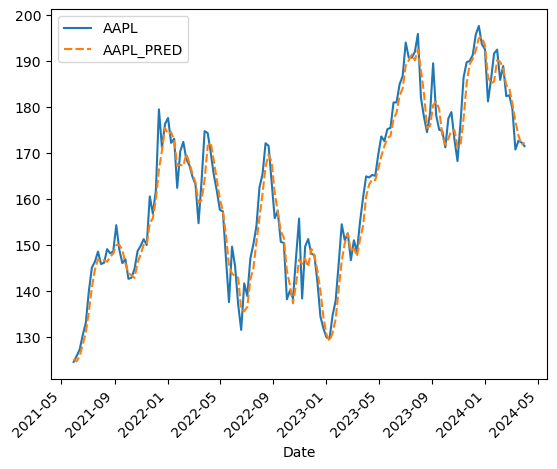

In [68]:
true_and_preds = y_test.to_frame()
true_and_preds['AAPL_PRED'] = y_test_pred

fig, ax = plt.subplots(1, 1, dpi=100)
sns.lineplot(data=true_and_preds, ax=ax)

ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=45, ha='right')
plt.show(fig)

In [69]:
np.set_printoptions(suppress=True)
model.coef_

array([ 0.6204162 , -0.72237649,  0.69762574, -0.10725356,  0.74064099,
       -0.09606596, -0.02462222, 29.07494524])

In [70]:
coef_table = {
    'name': features.columns,
    'beta': model.coef_
}

coef_table = pd.DataFrame(coef_table)

from IPython.display import display
display(coef_table.T)

,0,1,2,3,4,5,6,7
name,MSFT,GOOG,AMZN,AAPL_Vol,AAPL_RSI,EPS,PER,AAPL_MA21
beta,0.620416,-0.722376,0.697626,-0.107254,0.740641,-0.096066,-0.024622,29.074945


In [71]:
price_df.corr().style.background_gradient('RdBu')

,AAPL,MSFT,GOOG,AMZN,AAPL_Vol,AAPL_RSI,EPS,PER,AAPL_MA21
AAPL,1.000000,0.985570,0.969023,0.898540,-0.570302,-0.024496,0.966913,0.899604,0.999202
MSFT,0.985570,1.000000,0.981039,0.928095,-0.582721,-0.021704,0.958587,0.897039,0.984969
GOOG,0.969023,0.981039,1.000000,0.940022,-0.641349,-0.023729,0.964379,0.860809,0.968560
AMZN,0.898540,0.928095,0.940022,1.000000,-0.632587,0.001669,0.874682,0.894941,0.896791
AAPL_Vol,-0.570302,-0.582721,-0.641349,-0.632587,1.000000,-0.065511,-0.653633,-0.466153,-0.568758
AAPL_RSI,-0.024496,-0.021704,-0.023729,0.001669,-0.065511,1.000000,-0.067935,0.019149,-0.046316
EPS,0.966913,0.958587,0.964379,0.874682,-0.653633,-0.067935,1.000000,0.793877,0.968122
PER,0.899604,0.897039,0.860809,0.894941,-0.466153,0.019149,0.793877,1.000000,0.898046
AAPL_MA21,0.999202,0.984969,0.968560,0.896791,-0.568758,-0.046316,0.968122,0.898046,1.000000
